In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer



In [2]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target



In [3]:
# Divide the dataset into training and testing sets
train_size = int(len(X) * 0.7)
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]



In [4]:
# Define the logistic sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the logistic regression function
def logistic_regression(X, y, alpha=0.1, num_iterations=100):
    # Initialize the weights
    w = np.zeros(X.shape[1])
    # Initialize the lists to store the training and testing accuracy for each iteration
    train_acc = []
    test_acc = []
    # Iterate for the specified number of iterations
    for i in range(num_iterations):
        # Compute the predicted values
        y_pred = sigmoid(np.dot(X, w))
        # Compute the error
        error = y - y_pred
        # Update the weights
        w += alpha * np.dot(X.T, error)
        # Compute the training accuracy
        train_acc.append(np.mean((y_pred > 0.5) == y))
        # Compute the testing accuracy
        test_acc.append(np.mean((sigmoid(np.dot(X_test, w)) > 0.5) == y_test))
    # Return the weights and the lists of training and testing accuracy
    return w, train_acc, test_acc



In [5]:
# Add a column of ones to the feature matrices for the bias term
X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

# Train the logistic regression model on the training set
w, train_acc, test_acc = logistic_regression(X_train, y_train)


<ipython-input-4-c6e413d74659>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [6]:

# Print the confusion matrix, sensitivity, and specificity for the testing set
y_pred = sigmoid(np.dot(X_test, w))
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
conf_matrix = np.zeros((2, 2))
for i in range(len(y_test)):
    conf_matrix[int(y_test[i]), int(y_pred[i])] += 1
tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Confusion matrix:")
print(conf_matrix)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)



Confusion matrix:
[[ 32.   7.]
 [ 12. 120.]]
Sensitivity: 0.9090909090909091
Specificity: 0.8205128205128205


<ipython-input-4-c6e413d74659>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


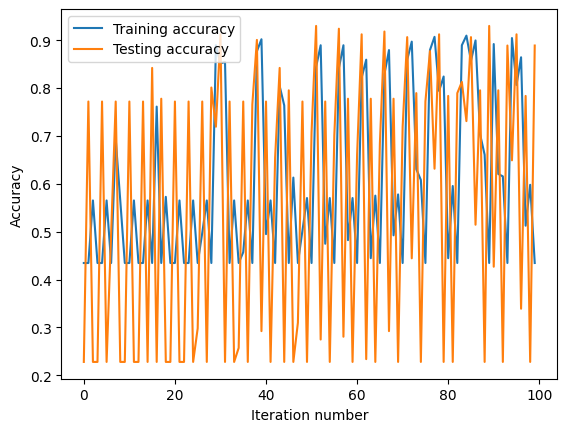

In [7]:
# Plot the training and testing accuracy vs iteration number
plt.plot(train_acc, label="Training accuracy")
plt.plot(test_acc, label="Testing accuracy")
plt.xlabel("Iteration number")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
